<a href="https://colab.research.google.com/github/varnikaaavyas/Time-Series-Analysis/blob/main/Converting_non_stationary_to_stationary_data_and_checking_Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** *italicized text*Name - Varnika**\
**Enrollment No. - E22MCAG0015**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/DailyDelhiClimateTest (1).csv")
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**QUESTION 2.**

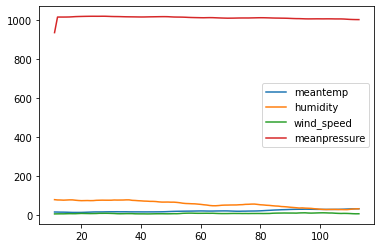

In [ ]:
df.date = pd.to_datetime(df.date)
df_rolling = df.rolling(window =12).mean()
df_rolling.plot(kind='line')
plt.show()

**QUESTION 3.**

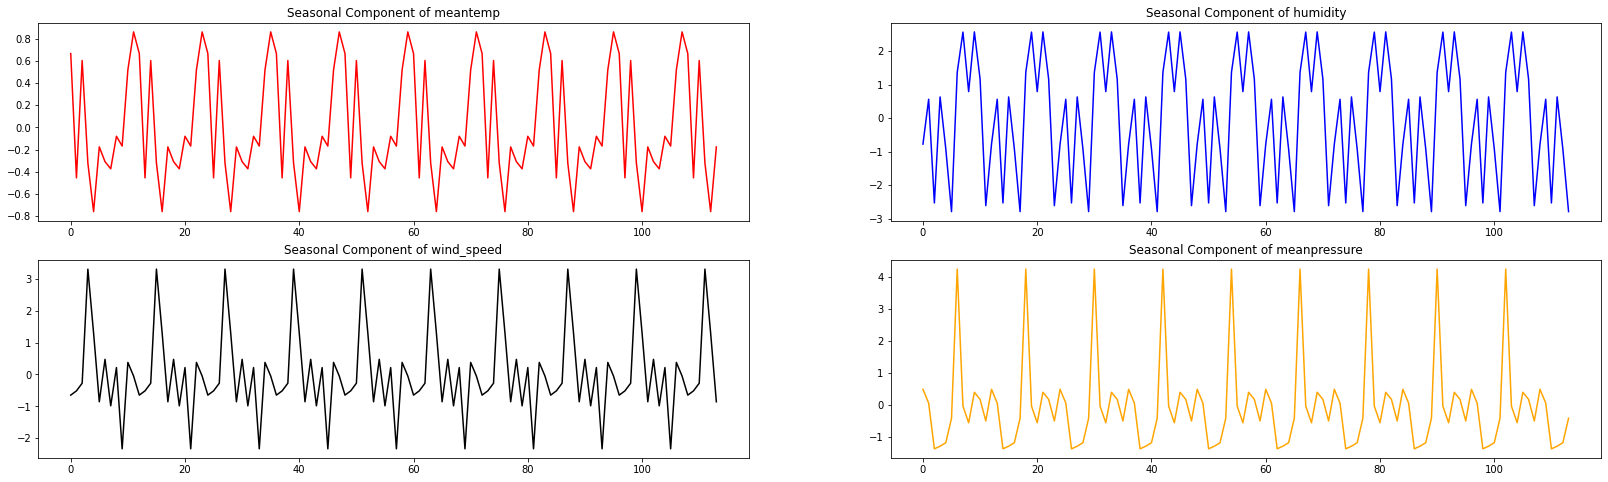

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_meantemp = seasonal_decompose(df['meantemp'], model='additive', period=12)
result_humidity = seasonal_decompose(df['humidity'], model ='additive', period = 12)
result_windspeed = seasonal_decompose(df['wind_speed'], model='additive', period = 12)
result_meanpressure = seasonal_decompose(df['meanpressure'], model = 'additive', period =12)

fig, ax = plt.subplots(2,2, figsize=(28,8))

ax[0,0].plot(range (0, len(result_meantemp.seasonal)), result_meantemp.seasonal, color ='red')
ax[0,0].set_title('Seasonal Component of meantemp')
ax[0,1].plot(range (0, len(result_humidity.seasonal)), result_humidity.seasonal, color = 'blue')
ax[0,1].set_title('Seasonal Component of humidity')
ax[1,0].plot(range (0, len(result_windspeed.seasonal)), result_windspeed.seasonal, color = 'black')
ax[1,0].set_title('Seasonal Component of wind_speed')
ax[1,1].plot(range (0, len(result_meanpressure.seasonal)), result_meanpressure.seasonal, color = 'orange')
ax[1,1].set_title('Seasonal Component of meanpressure')
plt.show()

**QUESTION 4.**

In [ ]:
def statistical_test(series):
    # ADF test
    from statsmodels.tsa.stattools import adfuller

    result = adfuller(series, autolag = 'AIC')
    print("Result:", result)
    print('\n ADF Statistic:', result[0])
    print('\n p-value:', result[1])
    print('\n no of lags:', result[2])
    print('\n no of observations used:', result[3])
    for key, value in result[4].items():
        print("\n Critical Values:-")
        print(f'{key} : {value}')

    if result[1] > 0.05:
        print("H0 is accepted: Series is NON-STATIONARY")
    else:
        print("H1 is accepted: Series is STATIONARY")

    #KPSS test
    from statsmodels.tsa.stattools import kpss

    kpss_test = kpss(series)

    print("Result:", kpss_test)
    print('\n KPSS Statistic:', kpss_test[0])
    print('\n p-value:', kpss_test[1])
    print('\n no of lags:', kpss_test[2])
    for key, value in kpss_test[3].items():
        print("\n Critical Values:-")
        print(f'{key} : {value}')

    if kpss_test[1] > 0.05:
        print("H0 is accepted: Series is STATIONARY")
    else:
        print("H1 is accepted: Series is NON-STATIONARY")


    # Final result
    if result[1] > 0.05 and kpss_test[1] < 0.05:
        print("\nFinal: Series is NON-stationary")
    elif result[1] > 0.05 and kpss_test[1] > 0.05:
        print("\nFinal: Series is difference stationary")
    elif result[1] < 0.05 and kpss_test[1] > 0.05:
        print("\nFinal: Series is trend stationary")
    elif result[1] < 0.05 and kpss_test[1] < 0.05:
        print("\nFinal: Series is strictly stationary")

humidity = df.humidity
meanpressure = df.meanpressure
meantemp = df.meantemp
windspeed = df.wind_speed

# ADF and KPSS for humidity

print("ADF and KPSS for humidity: ")
print(statistical_test(humidity))

ADF and KPSS for humidity: 
Result: (-0.6757281773610532, 0.8529367219992412, 7, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, 676.4277450858162)

 ADF Statistic: -0.6757281773610532

 p-value: 0.8529367219992412

 no of lags: 7

 no of observations used: 106

 Critical Values:-
1% : -3.4936021509366793

 Critical Values:-
5% : -2.8892174239808703

 Critical Values:-
10% : -2.58153320754717
H0 is accepted: Series is NON-STATIONARY
Result: (0.8702292908894785, 0.01, 13, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

 KPSS Statistic: 0.8702292908894785

 p-value: 0.01

 no of lags: 13

 Critical Values:-
10% : 0.347

 Critical Values:-
5% : 0.463

 Critical Values:-
2.5% : 0.574

 Critical Values:-
1% : 0.739
H1 is accepted: Series is NON-STATIONARY

Final: Series is NON-stationary
None


In [ ]:
# ADF and KPSS for meanpressure

print("ADF and KPSS for meanpressure: ")
print(statistical_test(meanpressure))

ADF and KPSS for meanpressure: 
Result: (-2.182219693817165, 0.2127618516680096, 2, 111, {'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}, 402.73166679835003)

 ADF Statistic: -2.182219693817165

 p-value: 0.2127618516680096

 no of lags: 2

 no of observations used: 111

 Critical Values:-
1% : -3.490683082754047

 Critical Values:-
5% : -2.8879516565798817

 Critical Values:-
10% : -2.5808574442009578
H0 is accepted: Series is NON-STATIONARY
Result: (0.2166111508720008, 0.1, 13, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

 KPSS Statistic: 0.2166111508720008

 p-value: 0.1

 no of lags: 13

 Critical Values:-
10% : 0.347

 Critical Values:-
5% : 0.463

 Critical Values:-
2.5% : 0.574

 Critical Values:-
1% : 0.739
H0 is accepted: Series is STATIONARY

Final: Series is difference stationary
None


In [ ]:
# ADF and KPSS for meantemp

print("ADF and KPSS for meantemp: ")
print(statistical_test(meantemp))


ADF and KPSS for meantemp: 
Result: (-1.096474275875619, 0.7164758731775932, 0, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 386.6781886302757)

 ADF Statistic: -1.096474275875619

 p-value: 0.7164758731775932

 no of lags: 0

 no of observations used: 113

 Critical Values:-
1% : -3.489589552580676

 Critical Values:-
5% : -2.887477210140433

 Critical Values:-
10% : -2.580604145195395
H0 is accepted: Series is NON-STATIONARY
Result: (0.8368064377309853, 0.01, 13, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

 KPSS Statistic: 0.8368064377309853

 p-value: 0.01

 no of lags: 13

 Critical Values:-
10% : 0.347

 Critical Values:-
5% : 0.463

 Critical Values:-
2.5% : 0.574

 Critical Values:-
1% : 0.739
H1 is accepted: Series is NON-STATIONARY

Final: Series is NON-stationary
None


In [ ]:
# ADF and KPSS for windspeed

print("ADF and KPSS for windspeed: ")
print(statistical_test(windspeed))

ADF and KPSS for windspeed: 
Result: (-6.518055277669119, 1.0590893293993272e-08, 0, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 520.7741988971286)

 ADF Statistic: -6.518055277669119

 p-value: 1.0590893293993272e-08

 no of lags: 0

 no of observations used: 113

 Critical Values:-
1% : -3.489589552580676

 Critical Values:-
5% : -2.887477210140433

 Critical Values:-
10% : -2.580604145195395
H1 is accepted: Series is STATIONARY
Result: (0.44190602286940134, 0.05909223152180978, 13, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

 KPSS Statistic: 0.44190602286940134

 p-value: 0.05909223152180978

 no of lags: 13

 Critical Values:-
10% : 0.347

 Critical Values:-
5% : 0.463

 Critical Values:-
2.5% : 0.574

 Critical Values:-
1% : 0.739
H0 is accepted: Series is STATIONARY

Final: Series is trend stationary
None


**QUESTION 5.**

In [ ]:
# Log transformation on the dataset

log_meantemp = np.log(df.meantemp)
log_humidity = np.log(df.humidity)
log_wind_speed = np.log(df.wind_speed)
log_meanpressure = np.log(df.meanpressure)

log_df = pd.DataFrame({'date': df.date, 'log_meantemp': log_meantemp, 'log_humidity': log_humidity, 'log_windspeed': log_wind_speed,'log_meanpressure': log_meanpressure})

# Calculating first difference

first_diff_df = log_df.apply(lambda x: x.diff(periods = 1) if x.name != 'date' else x)

# plotting the first difference vs log values

px.line(log_df, x = log_df.date, y = log_df.columns)

In [ ]:
px.line(first_diff_df, x = first_diff_df.date, y = first_diff_df.columns)

**QUESTION 6.**

In [ ]:
from statsmodels.stats.stattools import durbin_watson

def db_test(series):
    return durbin_watson(series)

DB = df.apply(lambda x: db_test(x) if x.name != 'date' else x).drop('date', axis=1).drop_duplicates().rename( columns={'meantemp': 'DB_meantemp',	'humidity':'DB_humidity', "wind_speed" : 'DB_wind_speed', "meanpressure": 'DB_meanpressure'}).round(5).style.hide_index()

print("For meantemp, Durbin Watson test result is very close to 0, so positive ACR")
print("For humidity, Durbin Watson test result is very close to 0, so positive ACR")
print("For wind speed, Durbin Watson test result is very close to 0, so positive ACR but not as strong as meantemp, humidity or meanpressure")
print("For meanpressure, Durbin Watson test result is very close to 0, so positive ACR")
DB

For meantemp, Durbin Watson test result is very close to 0, so positive ACR
For humidity, Durbin Watson test result is very close to 0, so positive ACR
For wind speed, Durbin Watson test result is very close to 0, so positive ACR but not as strong as meantemp, humidity or meanpressure
For meanpressure, Durbin Watson test result is very close to 0, so positive ACR


DB_meantemp,DB_humidity,DB_wind_speed,DB_meanpressure
0.005530,0.015570,0.173820,0.007950


**QUESTION 7.**

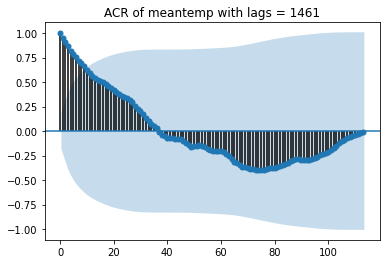

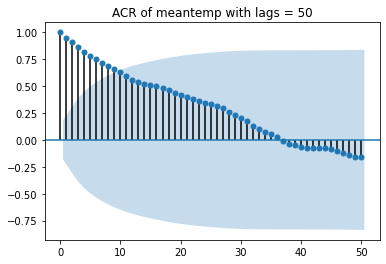

1st graph shows correlation between current value and lags of upto 1461 values (length of column)

 2nd graph shows that correlation is positive and significant for lags upto 50 because all the values are above upper limit threshold


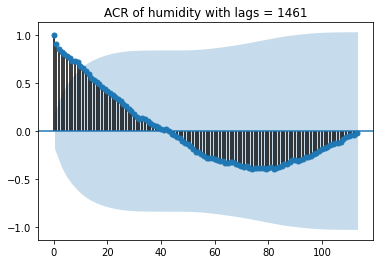

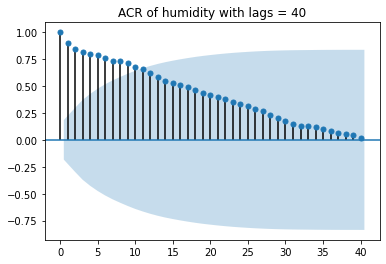

1st graph shows correlation between current value and lags of upto 1461 values (length of column)

 2nd graph shows that correlation is positive and significant for lags upto 40 because all the values are above upper limit threshold


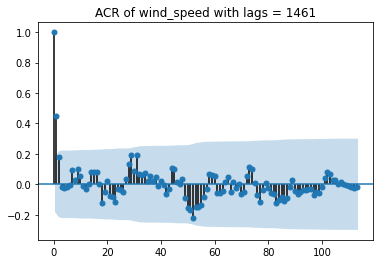

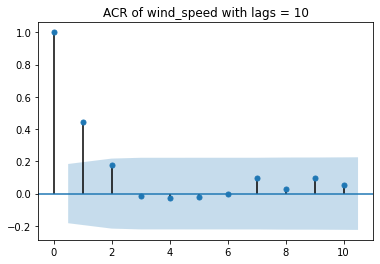

1st graph shows correlation between current value and lags of upto 1461 values (length of column)

 2nd graph shows that correlation is positive and significant for lags upto 10 because all the values are above upper limit threshold


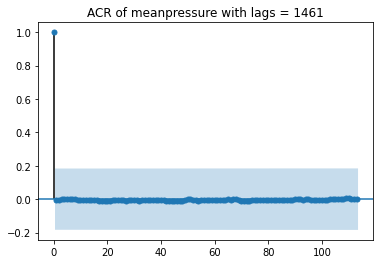

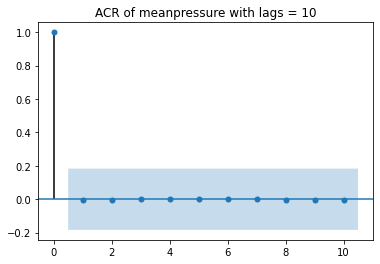

1st graph shows correlation between current value and lags of upto 1461 values (length of column)

 2nd graph shows that correlation is positive and significant for lags upto 1 but I've shown lags upto 10 because otherwise the graph would only consist 2 points


In [ ]:
import statsmodels.graphics.tsaplots as tsp

tsp.plot_acf(x = df.meantemp, lags = len(df.meantemp)-1, alpha = 0.05, title='ACR of meantemp with lags = 1461')
tsp.plot_acf(x = df.meantemp, lags = 50, alpha = 0.05, title='ACR of meantemp with lags = 50')
plt.show()

print('1st graph shows correlation between current value and lags of upto 1461 values (length of column)')
print('\n 2nd graph shows that correlation is positive and significant for lags upto 50 because all the values are above upper limit threshold')

tsp.plot_acf(x = df.humidity, lags = len(df.humidity)-1, alpha = 0.05, title='ACR of humidity with lags = 1461')
tsp.plot_acf(x = df.humidity, lags = 40, alpha = 0.05, title='ACR of humidity with lags = 40')
plt.show()
print('1st graph shows correlation between current value and lags of upto 1461 values (length of column)')
print('\n 2nd graph shows that correlation is positive and significant for lags upto 40 because all the values are above upper limit threshold')

tsp.plot_acf(x = df.wind_speed, lags = len(df.wind_speed)-1, alpha = 0.05, title='ACR of wind_speed with lags = 1461')
tsp.plot_acf(x = df.wind_speed, lags = 10, alpha = 0.05, title='ACR of wind_speed with lags = 10')
plt.show()
print('1st graph shows correlation between current value and lags of upto 1461 values (length of column)')
print('\n 2nd graph shows that correlation is positive and significant for lags upto 10 because all the values are above upper limit threshold')

tsp.plot_acf(x = df.meanpressure, lags = len(df.meanpressure)-1, alpha = 0.05, title='ACR of meanpressure with lags = 1461')
tsp.plot_acf(x = df.meanpressure, lags = 10, alpha = 0.05, title='ACR of meanpressure with lags = 10')
plt.show()
print('1st graph shows correlation between current value and lags of upto 1461 values (length of column)')
print("\n 2nd graph shows that correlation is positive and significant for lags upto 1 but I've shown lags upto 10 because otherwise the graph would only consist 2 points")